<a id="1.1"></a>
<h2 style="font-family:arial;text-align:center; font-size: 40px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:lightblue; background-color: #ffffff;"> <b>HDIP DATA ANALYTICS</b></h2>

<div style="padding:20px;color:white;margin:0;font-size:35px;font-family:arial;text-align:center;display:fill;border-radius:5px;background-color:lightblue;overflow:hidden"><b>MACHINE LEARNING FOR BUSINESS | SEM 2</b></div>

Lecturer(s): Dr. Muhammad Iqbal

Issue Date: 14th September 2023

Submission Deadline Date: 5th November 2023

Students: **_Bárbara Abreu Costa 2023099_** | **_Juliana Cristina da Cunha Brum 2023021_** 

GitHub Repository: https://github.com/JulianaCBrum/MACHINE-LEARNING-

-----

<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:white;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">FLIGHT PRICE</p>

**_Quick overview of our dataset_** 

> This is a dataset found on Kaggle that contains informations about flight booking options avaiable through the website Easymytrip for flights between the top 6 metropolises in India. Data had been collected in two stages: for business calss ticket and for economy class ticket. The site provided a total 300.261 unique fligh booking possibilities, from February 11 to March 31 of 2022. 

<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:white;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">DICTIONARY</p>

|STT | ATTRIBUTE NAME | MEANING |
|:---| :--- |:--- |
| 0 | Date
| 1 | Airline | The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
| 2 | Flight | Flight stores information regarding the plane's flight code. It is a categorical feature.
| 3 | Source City | City from which the flight takes off. It is a categorical feature having 6 unique cities.
| 4 | Departure Time |This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
| 5 | Stops | A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
| 6 | Arrival Time | This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
| 7 | Destination City | City where the flight will land. It is a categorical feature having 6 unique cities.
| 8 | Class | A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
| 9 | Duration | A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
| 10 | Days Left | This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
| 11 | Price | Target variable stores information of the ticket price.

-----

### Reading dataset and understanding the data 

To start with our project, in the first code we are importing some libraries to work with such as: pandas, seaborn, matplotlib and numpy. 

"A library is a collection of precompiled codes that can be used later on in a program for some specific well-defined operations. Other than pre-compiled codes, a library may contain documentation, configuration data, message templates, classes, and values, etc." (parthmanchanda81, 2021)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

The next 2 codes are to read the dataset (which one we are calling df) and geting its first 5 rows, in order to understand the data.

In [3]:
df = pd.read_csv('business.csv')

In [4]:
df.head()

date    airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  Air India      AI       868    18:00  Delhi    02h 00m   
1  11-02-2022  Air India      AI       624    19:00  Delhi    02h 15m   
2  11-02-2022  Air India      AI       531    20:00  Delhi    24h 45m   
3  11-02-2022  Air India      AI       839    21:25  Delhi    26h 30m   
4  11-02-2022  Air India      AI       544    17:15  Delhi    06h 40m   

                                                stop arr_time      to   price  
0                                          non-stop     20:00  Mumbai  25,612  
1                                          non-stop     21:15  Mumbai  25,612  
2  1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...    20:45  Mumbai  42,220  
3  1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...    23:55  Mumbai  44,450  
4  1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...    23:55  Mumbai  46,690

The code df.shape is to see the number of rows and columns in the dataset. In this case, we have 93487 rows and 11 columns. 

In [5]:
df.shape

(93487, 11)

The code df.info is to check information about the dataset such as: name of columns, data type, if it has missing values, ect. In this case, we have 11 columns, only one of them has integer values, the others 10 are object. So, to apply machine learning, we have to make some transformation in this data. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


The code df.isnull is to check if we have some missing values in the data. As we can see in the output , we do not have it. 

In [7]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

To ensure data quality and avoid misleading or redundant information, We are checking possible duplicated data with the code df.duplicated. 



<div style="text-align: right"> 180 words.</div>



In [8]:
df.duplicated().sum()

0

### Preparing the dataset to apply Time Series Models. 

Some columns are irrelevant for our analysis, so we are going to drop them using the next code. As we are modifying the dataset, we are going to change its name. Now it is df1. 

"Dropping columns is an important step in the data cleaning process for several reasons: saves time and memory, improves data accuracy, enhances data clarity, focus on a subset of data, prevents data leakage." (Hackr.io, n.d.)

In [9]:
df1 = df.drop(['ch_code', 'num_code', 'dep_time', 'stop', 'arr_time'], axis=1)
df1.head()

date    airline   from time_taken      to   price
0  11-02-2022  Air India  Delhi    02h 00m  Mumbai  25,612
1  11-02-2022  Air India  Delhi    02h 15m  Mumbai  25,612
2  11-02-2022  Air India  Delhi    24h 45m  Mumbai  42,220
3  11-02-2022  Air India  Delhi    26h 30m  Mumbai  44,450
4  11-02-2022  Air India  Delhi    06h 40m  Mumbai  46,690

As the price column has object values, to apply Machine Learning models and make plots, we need to replace it as integers values. The below is to do that. 

In [10]:
df1['price'] = df1['price'].str.replace(',', '').astype(float)

df1.head()


date    airline   from time_taken      to    price
0  11-02-2022  Air India  Delhi    02h 00m  Mumbai  25612.0
1  11-02-2022  Air India  Delhi    02h 15m  Mumbai  25612.0
2  11-02-2022  Air India  Delhi    24h 45m  Mumbai  42220.0
3  11-02-2022  Air India  Delhi    26h 30m  Mumbai  44450.0
4  11-02-2022  Air India  Delhi    06h 40m  Mumbai  46690.0

The main goal of this analysis is to predict the price. So the next code is to understand the price column's behaviour through the sns.displot 

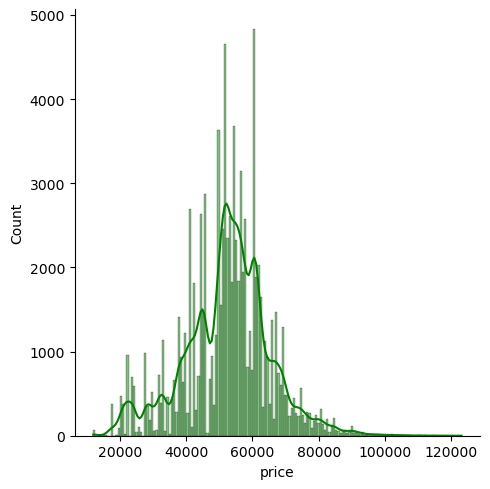

In [11]:
sns.displot(df1['price'],color='green',kde=True)

As the dataset has a wide number of rows with information for the same days, to perform Time Series models we have to resample the data. So, we will use the code groupby (below), to aggregate all rows which have the same day's data and use the mean value of them to create a single row for each day in the dataset. This process is called downsampling. 

"Downsampling is to resample a time-series dataset to a wider time frame. For example, from minutes to hours, from days to years. The result will have a reduced number of rows and values can be aggregated with mean(), min(), max(), sum() etc." (Chen, 2020).

The new dataset is called df1_daily_mean. 

In [12]:
df1['date'] = pd.to_datetime(df1['date'])

df1_daily_mean = df1.groupby(df1['date'].dt.date)['price'].mean()

df1_daily_mean

C:\Users\jujub\AppData\Local\Temp\ipykernel_31440\1976572297.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['date'] = pd.to_datetime(df1['date'])


date
2022-01-03    52113.802120
2022-02-03    52384.847236
2022-02-13    60313.822331
2022-02-14    56120.287087
2022-02-15    56149.915397
2022-02-16    53643.310488
2022-02-17    54501.171604
2022-02-18    53224.650386
2022-02-19    52981.195297
2022-02-20    54247.303856
2022-02-21    51845.794695
2022-02-22    51991.619675
2022-02-23    52172.086514
2022-02-24    52441.797235
2022-02-25    52374.451431
2022-02-26    52063.309830
2022-02-27    52824.242843
2022-02-28    52334.639336
2022-03-03    51919.704211
2022-03-13    52360.828629
2022-03-14    51264.440488
2022-03-15    51810.985112
2022-03-16    51869.054609
2022-03-17    51475.459162
2022-03-18    51924.139056
2022-03-19    51808.754280
2022-03-20    52150.719697
2022-03-21    51214.290386
2022-03-22    51406.713790
2022-03-23    52153.949178
2022-03-24    51583.182456
2022-03-25    52092.968703
2022-03-26    51383.279592
2022-03-27    51160.208098
2022-03-28    51209.790072
2022-03-29    51742.102235
2022-03-30    51558.758

In [13]:
df1_daily_mean = df1_daily_mean.reset_index()

In [14]:

df1_daily_mean['date'] = pd.to_datetime(df1_daily_mean['date'])

Once we have the dataset with the mean price for the days, we have to merge it with the previous dataset. Now we have: price_x (original) and price_y (mean for each day). The name of the dataset has changed for merged_df.  

In [15]:
merged_df = pd.merge(df1, df1_daily_mean, on='date', how='left')

merged_df.head()

date    airline   from time_taken      to  price_x      price_y
0 2022-11-02  Air India  Delhi    02h 00m  Mumbai  25612.0  65169.31203
1 2022-11-02  Air India  Delhi    02h 15m  Mumbai  25612.0  65169.31203
2 2022-11-02  Air India  Delhi    24h 45m  Mumbai  42220.0  65169.31203
3 2022-11-02  Air India  Delhi    26h 30m  Mumbai  44450.0  65169.31203
4 2022-11-02  Air India  Delhi    06h 40m  Mumbai  46690.0  65169.31203

As it has been merged already we only need one row for day in the dataset. So, the code below is to get that.  

In [16]:
grouped_df = merged_df.groupby('date').agg({'airline': 'first', 'from': 'first', 'time_taken': 'first', 'to': 'first', 'price_x': 'mean', 'price_y': 'mean'})

grouped_df = grouped_df.reset_index()

grouped_df.head()

date    airline   from time_taken      to       price_x       price_y
0 2022-01-03    Vistara  Delhi    02h 10m  Mumbai  52113.802120  52113.802120
1 2022-02-03    Vistara  Delhi    02h 10m  Mumbai  52384.847236  52384.847236
2 2022-02-13    Vistara  Delhi    02h 10m  Mumbai  60313.822331  60313.822331
3 2022-02-14  Air India  Delhi    02h 00m  Mumbai  56120.287087  56120.287087
4 2022-02-15    Vistara  Delhi    02h 10m  Mumbai  56149.915397  56149.915397

We do not need two columns with the same information (price_y and price_x). So we are dropping price_y and only keeping price_x. 

In [17]:
grouped_df.drop('price_y', axis=1, inplace=True)
grouped_df.head(50)

date    airline   from time_taken      to       price_x
0  2022-01-03    Vistara  Delhi    02h 10m  Mumbai  52113.802120
1  2022-02-03    Vistara  Delhi    02h 10m  Mumbai  52384.847236
2  2022-02-13    Vistara  Delhi    02h 10m  Mumbai  60313.822331
3  2022-02-14  Air India  Delhi    02h 00m  Mumbai  56120.287087
4  2022-02-15    Vistara  Delhi    02h 10m  Mumbai  56149.915397
5  2022-02-16    Vistara  Delhi    02h 10m  Mumbai  53643.310488
6  2022-02-17  Air India  Delhi    02h 00m  Mumbai  54501.171604
7  2022-02-18    Vistara  Delhi    02h 10m  Mumbai  53224.650386
8  2022-02-19    Vistara  Delhi    02h 10m  Mumbai  52981.195297
9  2022-02-20    Vistara  Delhi    02h 10m  Mumbai  54247.303856
10 2022-02-21    Vistara  Delhi    02h 10m  Mumbai  51845.794695
11 2022-02-22    Vistara  Delhi    02h 10m  Mumbai  51991.619675
12 2022-02-23    Vistara  Delhi    02h 10m  Mumbai  52172.086514
13 2022-02-24    Vistara  Delhi    02h 10m  Mumbai  52441.797235
14 2022-02-25    Vistara  Delhi    02h 10m  Mumbai  52374.451431
15 2022-02-26    Vistara  Delhi    02h 10m  Mumbai  52063.309830
16 2022-02-27    Vistara  Delhi    02h 10m  Mumbai  52824.242843
17 2022-02-28    Vistara  Delhi    02h 10m  Mumbai  52334.639336
18 2022-03-03    Vistara  Delhi    02h 10m  Mumbai  51919.704211
19 2022-03-13    Vistara  Delhi    02h 10m  Mumbai  52360.828629
20 2022-03-14    Vistara  Delhi    02h 10m  Mumbai  51264.440488
21 2022-03-15    Vistara  Delhi    02h 10m  Mumbai  51810.985112
22 2022-03-16    Vistara  Delhi    02h 10m  Mumbai  51869.054609
23 2022-03-17    Vistara  Delhi    02h 10m  Mumbai  51475.459162
24 2022-03-18    Vistara  Delhi    02h 10m  Mumbai  51924.139056
25 2022-03-19    Vistara  Delhi    02h 10m  Mumbai  51808.754280
26 2022-03-20    Vistara  Delhi    02h 10m  Mumbai  52150.719697
27 2022-03-21    Vistara  Delhi    02h 10m  Mumbai  51214.290386
28 2022-03-22    Vistara  Delhi    02h 10m  Mumbai  51406.713790
29 2022-03-23    Vistara  Delhi    02h 10m  Mumbai  52153.949178
30 2022-03-24    Vistara  Delhi    02h 10m  Mumbai  51583.182456
31 2022-03-25    Vistara  Delhi    02h 10m  Mumbai  52092.968703
32 2022-03-26    Vistara  Delhi    02h 10m  Mumbai  51383.279592
33 2022-03-27    Vistara  Delhi    02h 10m  Mumbai  51160.208098
34 2022-03-28    Vistara  Delhi    02h 10m  Mumbai  51209.790072
35 2022-03-29    Vistara  Delhi    02h 10m  Mumbai  51742.102235
36 2022-03-30    Vistara  Delhi    02h 10m  Mumbai  51558.758230
37 2022-03-31    Vistara  Delhi    02h 10m  Mumbai  51124.505820
38 2022-04-03    Vistara  Delhi    02h 10m  Mumbai  52008.284992
39 2022-05-03    Vistara  Delhi    02h 10m  Mumbai  51890.213597
40 2022-06-03    Vistara  Delhi    02h 10m  Mumbai  52539.281974
41 2022-07-03    Vistara  Delhi    02h 10m  Mumbai  51664.004365
42 2022-08-03    Vistara  Delhi    02h 10m  Mumbai  51536.578109
43 2022-09-03    Vistara  Delhi    02h 10m  Mumbai  52183.743781
44 2022-10-03    Vistara  Delhi    02h 10m  Mumbai  52074.678982
45 2022-11-02  Air India  Delhi    02h 00m  Mumbai  65169.312030
46 2022-11-03    Vistara  Delhi    02h 10m  Mumbai  52077.936396
47 2022-12-02    Vistara  Delhi    02h 10m  Mumbai  60455.848506
48 2022-12-03    Vistara  Delhi    02h 10m  Mumbai  52057.186869

This dataset, after prepared for Time Series, has only one row of data in the months: January, April, May, June, July, August, September and October. And two rows of data in November and December of 2022.

So, we are going to drop those rows and only work with the months February and March. 

The dataset now, is called df_timeseries.

In [18]:
grouped_df['date'] = pd.to_datetime(grouped_df['date'])

grouped_df = grouped_df[(grouped_df['date'].dt.month == 2) | (grouped_df['date'].dt.month == 3)]

df_timeseries = grouped_df.reset_index(drop=True)

df_timeseries.head()

date    airline   from time_taken      to       price_x
0 2022-02-03    Vistara  Delhi    02h 10m  Mumbai  52384.847236
1 2022-02-13    Vistara  Delhi    02h 10m  Mumbai  60313.822331
2 2022-02-14  Air India  Delhi    02h 00m  Mumbai  56120.287087
3 2022-02-15    Vistara  Delhi    02h 10m  Mumbai  56149.915397
4 2022-02-16    Vistara  Delhi    02h 10m  Mumbai  53643.310488

In order to apply Time Series is necessary to change the index of the dataset, and replace it with the date. We are using the code set_index to do that. 

"A time series is a series of data points indexed in time order. If you index the dataset by date, you can easily carry out a time series analysis." (AI, 2022).





<div style="text-align: right"> 338 words.</div>


In [19]:
df_timeseries['date'] = pd.to_datetime(df_timeseries['date'])

df_timeseries.set_index('date', inplace=True)

df_timeseries.head(50)

airline   from time_taken      to       price_x
date                                                         
2022-02-03    Vistara  Delhi    02h 10m  Mumbai  52384.847236
2022-02-13    Vistara  Delhi    02h 10m  Mumbai  60313.822331
2022-02-14  Air India  Delhi    02h 00m  Mumbai  56120.287087
2022-02-15    Vistara  Delhi    02h 10m  Mumbai  56149.915397
2022-02-16    Vistara  Delhi    02h 10m  Mumbai  53643.310488
2022-02-17  Air India  Delhi    02h 00m  Mumbai  54501.171604
2022-02-18    Vistara  Delhi    02h 10m  Mumbai  53224.650386
2022-02-19    Vistara  Delhi    02h 10m  Mumbai  52981.195297
2022-02-20    Vistara  Delhi    02h 10m  Mumbai  54247.303856
2022-02-21    Vistara  Delhi    02h 10m  Mumbai  51845.794695
2022-02-22    Vistara  Delhi    02h 10m  Mumbai  51991.619675
2022-02-23    Vistara  Delhi    02h 10m  Mumbai  52172.086514
2022-02-24    Vistara  Delhi    02h 10m  Mumbai  52441.797235
2022-02-25    Vistara  Delhi    02h 10m  Mumbai  52374.451431
2022-02-26    Vistara  Delhi    02h 10m  Mumbai  52063.309830
2022-02-27    Vistara  Delhi    02h 10m  Mumbai  52824.242843
2022-02-28    Vistara  Delhi    02h 10m  Mumbai  52334.639336
2022-03-03    Vistara  Delhi    02h 10m  Mumbai  51919.704211
2022-03-13    Vistara  Delhi    02h 10m  Mumbai  52360.828629
2022-03-14    Vistara  Delhi    02h 10m  Mumbai  51264.440488
2022-03-15    Vistara  Delhi    02h 10m  Mumbai  51810.985112
2022-03-16    Vistara  Delhi    02h 10m  Mumbai  51869.054609
2022-03-17    Vistara  Delhi    02h 10m  Mumbai  51475.459162
2022-03-18    Vistara  Delhi    02h 10m  Mumbai  51924.139056
2022-03-19    Vistara  Delhi    02h 10m  Mumbai  51808.754280
2022-03-20    Vistara  Delhi    02h 10m  Mumbai  52150.719697
2022-03-21    Vistara  Delhi    02h 10m  Mumbai  51214.290386
2022-03-22    Vistara  Delhi    02h 10m  Mumbai  51406.713790
2022-03-23    Vistara  Delhi    02h 10m  Mumbai  52153.949178
2022-03-24    Vistara  Delhi    02h 10m  Mumbai  51583.182456
2022-03-25    Vistara  Delhi    02h 10m  Mumbai  52092.968703
2022-03-26    Vistara  Delhi    02h 10m  Mumbai  51383.279592
2022-03-27    Vistara  Delhi    02h 10m  Mumbai  51160.208098
2022-03-28    Vistara  Delhi    02h 10m  Mumbai  51209.790072
2022-03-29    Vistara  Delhi    02h 10m  Mumbai  51742.102235
2022-03-30    Vistara  Delhi    02h 10m  Mumbai  51558.758230
2022-03-31    Vistara  Delhi    02h 10m  Mumbai  51124.505820

### Time Series Models 

Ploting the data, to see how it looks like. 

<Axes: xlabel='date'>

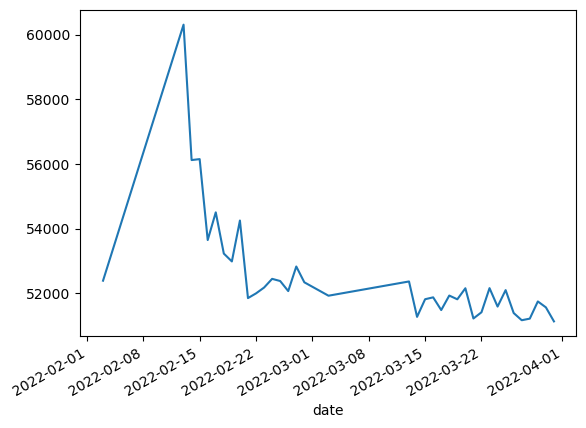

In [20]:
df_timeseries['price_x'].plot()

Plot the data price to see its distribution between the days we are going to work with. 

<Figure size 1400x800 with 0 Axes>

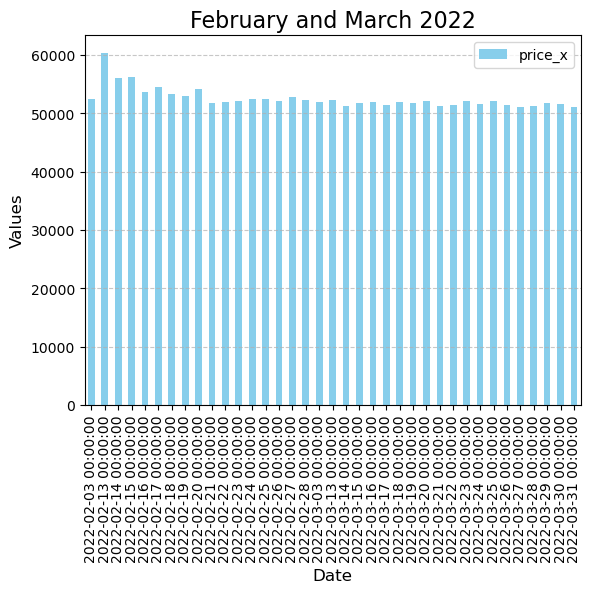

In [21]:
df_feb_mar_2022 = df_timeseries['2022-02':'2022-03']

plt.figure(figsize=(14, 8))  
df_feb_mar_2022.plot(kind='bar', color='skyblue')  

plt.title('February and March 2022', fontsize=16)  
plt.xlabel('Date', fontsize=12)  
plt.ylabel('Values', fontsize=12)  
plt.xticks(rotation=90) 

plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.show()

#### Dicky Fuller Test 

To make predictions using Time Series models is necessary checking if the data is stationary or not. In order to do that we can apply the Augmented Dicky Fuller Test. 

"When we make a model for forecasting purposes in time series analysis, we require a stationary time series for better prediction. ADF (Augmented Dickey-Fuller) test is a statistical significance test which means the test will give results in hypothesis tests with null and alternative hypotheses. As a result, we will have a p-value from which we will need to make inferences about the time series, whether it is stationary or not."(Verma, 2021).

The codes below is to import the Dicky Fuller test in the adfuller library and to apply the test itself. If the p_value is lower then 0.05 the data is stationary, if the p_value is greater then 0.05 the data is non stationary. 

In this case, we have a stationary data. 


In [25]:
from  statsmodels.tsa.stattools import adfuller


In [26]:
ADF_result = adfuller(df_timeseries['price_x'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.9105431048534696
p-value: 0.0441356427594409


#### Baseline model - Arithmetic Mean

Applying some Time Series models and checking their forecastings in our project is our main goal. So, we are going to start with very simple models called baseline models. 

"A baseline is a method that uses heuristics, simple summary statistics, randomness, or machine learning to create predictions for a dataset". (Sennikova, 2020).

Arithmetic mean is a model that applys the mean value of the data test to make predictions. 

The next code is to split the data between train and test, apply this model in order to make predictions for two weeks, evaluate it and plot the results. 

Mean Squared Error (MSE) for Arithmetic Mean Forecast: 2489954.6100041973


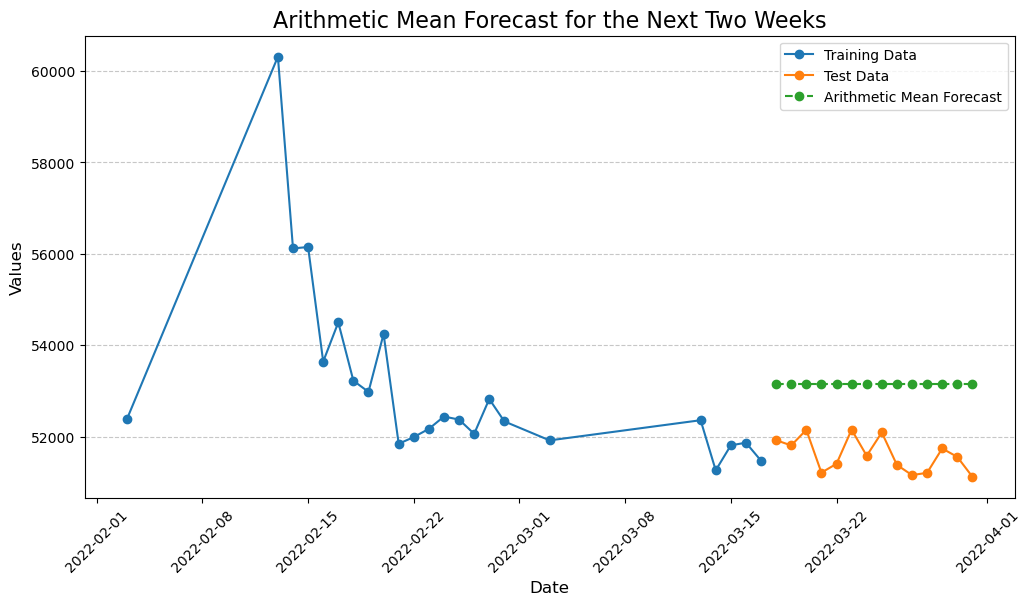

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming df_timeseries is your DataFrame

# Split the data into training and test sets
train = df_timeseries.iloc[:-14]  # Use all data except the last 2 weeks for training
test = df_timeseries.iloc[-14:]  # Last 2 weeks data for testing

# Calculate the mean of the training data
arithmetic_mean = train['price_x'].mean()

# Create a list of the mean values for the length of the test set
arithmetic_mean_forecast = [arithmetic_mean] * len(test)

# Calculate the mean squared error (MSE) for the arithmetic mean forecast
mse_arithmetic_mean = mean_squared_error(test['price_x'], arithmetic_mean_forecast)

# Print the MSE for the arithmetic mean forecast
print(f"Mean Squared Error (MSE) for Arithmetic Mean Forecast: {mse_arithmetic_mean}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['price_x'], label='Training Data', marker='o')
plt.plot(test.index, test['price_x'], label='Test Data', marker='o')
plt.plot(test.index, arithmetic_mean_forecast, label='Arithmetic Mean Forecast', linestyle='--', marker='o')

# Plot settings
plt.title('Arithmetic Mean Forecast for the Next Two Weeks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [28]:
print("Arithmetic Mean Forecasted Values:")
print(arithmetic_mean_forecast)

Arithmetic Mean Forecasted Values:
[53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662]


#### Baseline model - Naive Forecast 

Naive is, also, a baseline model that makes predictions based in values it got in the previous period. 

" A naive forecast is one in which the forecast for a given period is simply equal to the value observed in the previous period." (Zach, 2020).

The code below is to split the data into train and test, make the forecast for the next 14 days, evaluate the model with Mean Squared Error and plot the results. 


The Mean Squared Error (MSE) for the Seasonal Naive Forecast is: 0.0


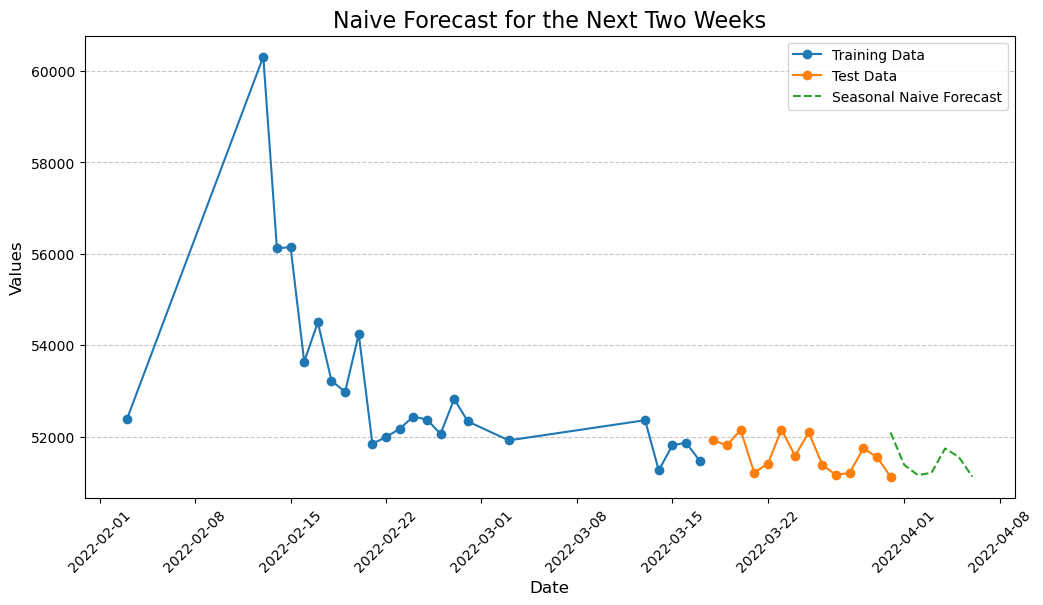

In [29]:
train = df_timeseries.iloc[:-14]  
test = df_timeseries.iloc[-14:]  

season_length = 14
forecast = df_timeseries['price_x'].iloc[-season_length:]


forecast_index = pd.date_range(start=df_timeseries.index[-1], periods=7, freq='D')

mse_seasonal_naive = mean_squared_error(test['price_x'], forecast)
print(f"The Mean Squared Error (MSE) for the Seasonal Naive Forecast is: {mse_seasonal_naive}")

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['price_x'], label='Training Data', marker='o')
plt.plot(test.index, test['price_x'], label='Test Data', marker='o')
plt.plot(forecast_index, forecast.values[-7:], label='Seasonal Naive Forecast', linestyle='--')  

plt.title('Naive Forecast for the Next Two Weeks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [30]:
print("Seasonal Naive Forecasted Values for the Next Two Weeks:")
print(forecast.values[-14:])

Seasonal Naive Forecasted Values for the Next Two Weeks:
[51924.13905622 51808.75427996 52150.71969697 51214.29038555
 51406.71378968 52153.94917788 51583.18245614 52092.96870268
 51383.27959184 51160.20809841 51209.79007239 51742.10223464
 51558.7582299  51124.50582011]


#### ARIMA Model

"ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values." (Prabhakaran, 2021).

As our data is already stationary, we can apply this model straight away. The code below is to import the ARIMA in the library, choose the forecast period (two weeks in this case), apply the model, evaluate the model using Mean Squared Error and plot the results. 

C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.

Mean Squared Error (MSE): 138067.34618518097


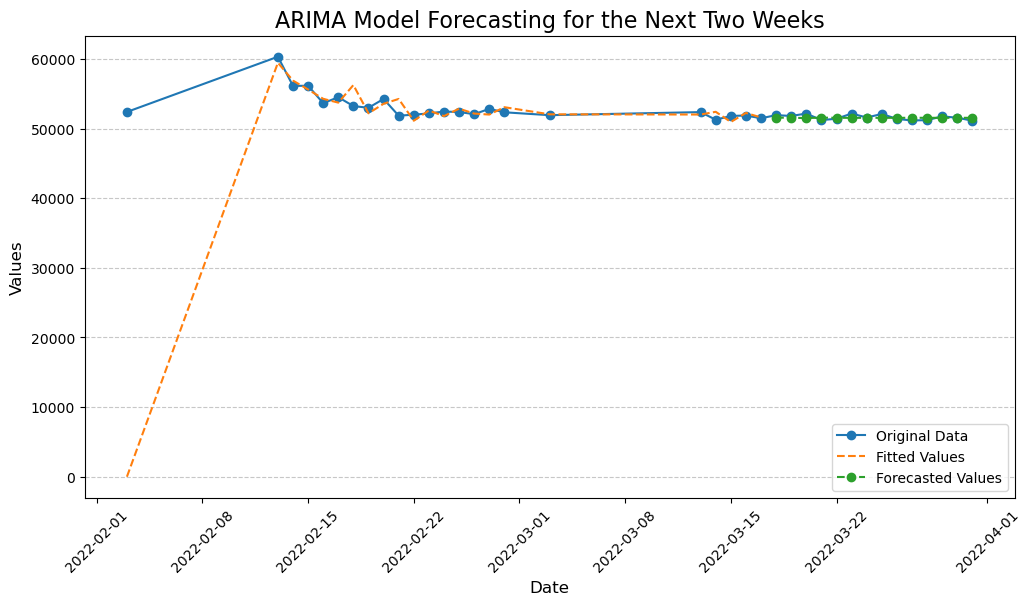

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Define the forecast period
forecast_period = 14  # Adjust the forecast period according to your requirement

# Split the data into training and test sets
train, test = train_test_split(df_timeseries, test_size=forecast_period, shuffle=False)

# Fit the ARIMA model
model = ARIMA(train['price_x'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next two weeks
forecast_values = model_fit.forecast(forecast_period)

# Evaluate the model
mse = mean_squared_error(test['price_x'], forecast_values)
print(f"Mean Squared Error (MSE): {mse}")

# Create the forecast index
forecast_index = pd.date_range(start=test.index[0], periods=forecast_period, freq='D')

# Plot the original data, the fitted values, and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df_timeseries.index, df_timeseries['price_x'], label='Original Data', marker='o')
plt.plot(model_fit.fittedvalues, label='Fitted Values', linestyle='--')
plt.plot(forecast_index, forecast_values, label='Forecasted Values', linestyle='--', marker='o')

# Plot settings
plt.title('ARIMA Model Forecasting for the Next Two Weeks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()


Here we have the forecasted values for two weeks, using ARIMA model. 

In [700]:

p = 2  
d = 1  
q = 1 

order = (p, d, q)

model = ARIMA(df_timeseries['price_x'], order=order)
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=14)

print(forecast.predicted_mean)



37    51927.350076
38    51519.459453
39    51736.349316
40    51621.336659
41    51682.335568
42    51649.984072
43    51667.142082
44    51658.042122
45    51662.868396
46    51660.308723
47    51661.666277
48    51660.946282
49    51661.328140
50    51661.125617
Name: predicted_mean, dtype: float64


C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-s

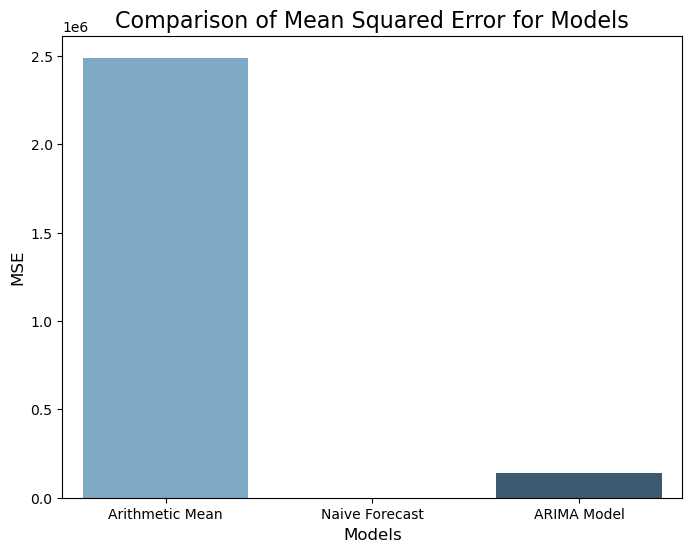

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ["Arithmetic Mean", "Naive Forecast", "ARIMA Model"]

mse_values = [2489954.6100041973, 0.00, 138067.34618518097]  

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=mse_values, palette="Blues_d")
plt.title('Comparison of Mean Squared Error for Models', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()


Now I am dropping two rows in the dataset. 

In [528]:
df_timeseries.head(50)

airline   from time_taken      to       price_x
date                                                         
2022-02-03    Vistara  Delhi    02h 10m  Mumbai  52384.847236
2022-02-13    Vistara  Delhi    02h 10m  Mumbai  60313.822331
2022-02-14  Air India  Delhi    02h 00m  Mumbai  56120.287087
2022-02-15    Vistara  Delhi    02h 10m  Mumbai  56149.915397
2022-02-16    Vistara  Delhi    02h 10m  Mumbai  53643.310488
2022-02-17  Air India  Delhi    02h 00m  Mumbai  54501.171604
2022-02-18    Vistara  Delhi    02h 10m  Mumbai  53224.650386
2022-02-19    Vistara  Delhi    02h 10m  Mumbai  52981.195297
2022-02-20    Vistara  Delhi    02h 10m  Mumbai  54247.303856
2022-02-21    Vistara  Delhi    02h 10m  Mumbai  51845.794695
2022-02-22    Vistara  Delhi    02h 10m  Mumbai  51991.619675
2022-02-23    Vistara  Delhi    02h 10m  Mumbai  52172.086514
2022-02-24    Vistara  Delhi    02h 10m  Mumbai  52441.797235
2022-02-25    Vistara  Delhi    02h 10m  Mumbai  52374.451431
2022-02-26    Vistara  Delhi    02h 10m  Mumbai  52063.309830
2022-02-27    Vistara  Delhi    02h 10m  Mumbai  52824.242843
2022-02-28    Vistara  Delhi    02h 10m  Mumbai  52334.639336
2022-03-03    Vistara  Delhi    02h 10m  Mumbai  51919.704211
2022-03-13    Vistara  Delhi    02h 10m  Mumbai  52360.828629
2022-03-14    Vistara  Delhi    02h 10m  Mumbai  51264.440488
2022-03-15    Vistara  Delhi    02h 10m  Mumbai  51810.985112
2022-03-16    Vistara  Delhi    02h 10m  Mumbai  51869.054609
2022-03-17    Vistara  Delhi    02h 10m  Mumbai  51475.459162
2022-03-18    Vistara  Delhi    02h 10m  Mumbai  51924.139056
2022-03-19    Vistara  Delhi    02h 10m  Mumbai  51808.754280
2022-03-20    Vistara  Delhi    02h 10m  Mumbai  52150.719697
2022-03-21    Vistara  Delhi    02h 10m  Mumbai  51214.290386
2022-03-22    Vistara  Delhi    02h 10m  Mumbai  51406.713790
2022-03-23    Vistara  Delhi    02h 10m  Mumbai  52153.949178
2022-03-24    Vistara  Delhi    02h 10m  Mumbai  51583.182456
2022-03-25    Vistara  Delhi    02h 10m  Mumbai  52092.968703
2022-03-26    Vistara  Delhi    02h 10m  Mumbai  51383.279592
2022-03-27    Vistara  Delhi    02h 10m  Mumbai  51160.208098
2022-03-28    Vistara  Delhi    02h 10m  Mumbai  51209.790072
2022-03-29    Vistara  Delhi    02h 10m  Mumbai  51742.102235
2022-03-30    Vistara  Delhi    02h 10m  Mumbai  51558.758230
2022-03-31    Vistara  Delhi    02h 10m  Mumbai  51124.505820

In [529]:
df_timeseries.drop(pd.to_datetime(['2022-02-03', '2022-03-03']), inplace=True)


In [530]:
df_timeseries.head(40)

airline   from time_taken      to       price_x
date                                                         
2022-02-13    Vistara  Delhi    02h 10m  Mumbai  60313.822331
2022-02-14  Air India  Delhi    02h 00m  Mumbai  56120.287087
2022-02-15    Vistara  Delhi    02h 10m  Mumbai  56149.915397
2022-02-16    Vistara  Delhi    02h 10m  Mumbai  53643.310488
2022-02-17  Air India  Delhi    02h 00m  Mumbai  54501.171604
2022-02-18    Vistara  Delhi    02h 10m  Mumbai  53224.650386
2022-02-19    Vistara  Delhi    02h 10m  Mumbai  52981.195297
2022-02-20    Vistara  Delhi    02h 10m  Mumbai  54247.303856
2022-02-21    Vistara  Delhi    02h 10m  Mumbai  51845.794695
2022-02-22    Vistara  Delhi    02h 10m  Mumbai  51991.619675
2022-02-23    Vistara  Delhi    02h 10m  Mumbai  52172.086514
2022-02-24    Vistara  Delhi    02h 10m  Mumbai  52441.797235
2022-02-25    Vistara  Delhi    02h 10m  Mumbai  52374.451431
2022-02-26    Vistara  Delhi    02h 10m  Mumbai  52063.309830
2022-02-27    Vistara  Delhi    02h 10m  Mumbai  52824.242843
2022-02-28    Vistara  Delhi    02h 10m  Mumbai  52334.639336
2022-03-13    Vistara  Delhi    02h 10m  Mumbai  52360.828629
2022-03-14    Vistara  Delhi    02h 10m  Mumbai  51264.440488
2022-03-15    Vistara  Delhi    02h 10m  Mumbai  51810.985112
2022-03-16    Vistara  Delhi    02h 10m  Mumbai  51869.054609
2022-03-17    Vistara  Delhi    02h 10m  Mumbai  51475.459162
2022-03-18    Vistara  Delhi    02h 10m  Mumbai  51924.139056
2022-03-19    Vistara  Delhi    02h 10m  Mumbai  51808.754280
2022-03-20    Vistara  Delhi    02h 10m  Mumbai  52150.719697
2022-03-21    Vistara  Delhi    02h 10m  Mumbai  51214.290386
2022-03-22    Vistara  Delhi    02h 10m  Mumbai  51406.713790
2022-03-23    Vistara  Delhi    02h 10m  Mumbai  52153.949178
2022-03-24    Vistara  Delhi    02h 10m  Mumbai  51583.182456
2022-03-25    Vistara  Delhi    02h 10m  Mumbai  52092.968703
2022-03-26    Vistara  Delhi    02h 10m  Mumbai  51383.279592
2022-03-27    Vistara  Delhi    02h 10m  Mumbai  51160.208098
2022-03-28    Vistara  Delhi    02h 10m  Mumbai  51209.790072
2022-03-29    Vistara  Delhi    02h 10m  Mumbai  51742.102235
2022-03-30    Vistara  Delhi    02h 10m  Mumbai  51558.758230
2022-03-31    Vistara  Delhi    02h 10m  Mumbai  51124.505820

<Axes: xlabel='date'>

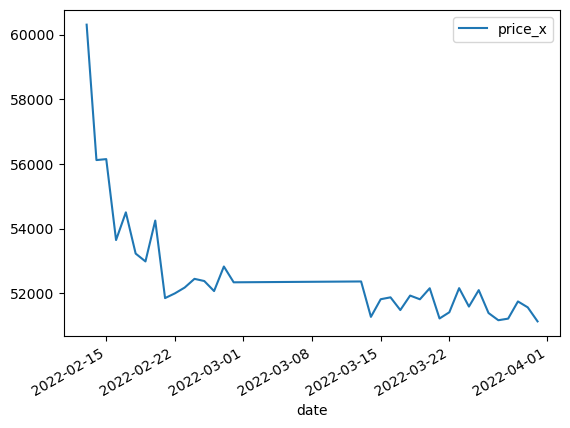

In [531]:
df_timeseries.plot()

<Figure size 1400x800 with 0 Axes>

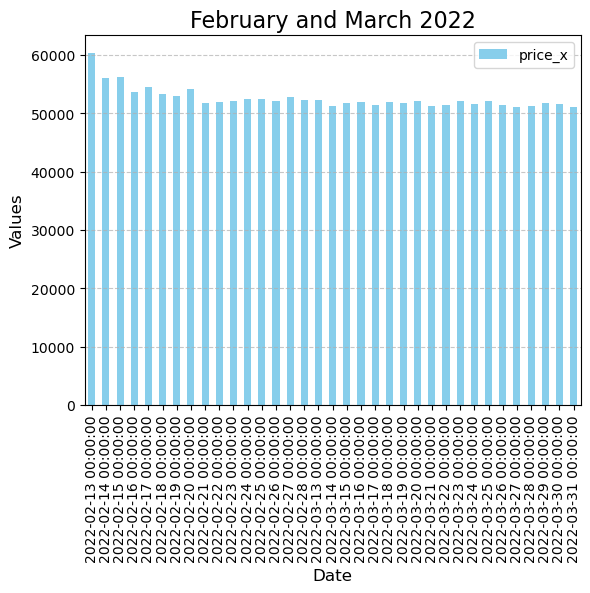

In [532]:
# Filter the data for the months of February and March in the year 2022
df_feb_mar_2022 = df_timeseries['2022-02':'2022-03']

# Plotting a bar chart for February and March
plt.figure(figsize=(14, 8))  # Adjusting the figure size
df_feb_mar_2022.plot(kind='bar', color='skyblue')  # Setting the color of the bars

plt.title('February and March 2022', fontsize=16)  # Setting the title and its font size
plt.xlabel('Date', fontsize=12)  # Setting the x-axis label and its font size
plt.ylabel('Values', fontsize=12)  # Setting the y-axis label and its font size
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a grid for better visualization

plt.show()

<Axes: xlabel='date'>

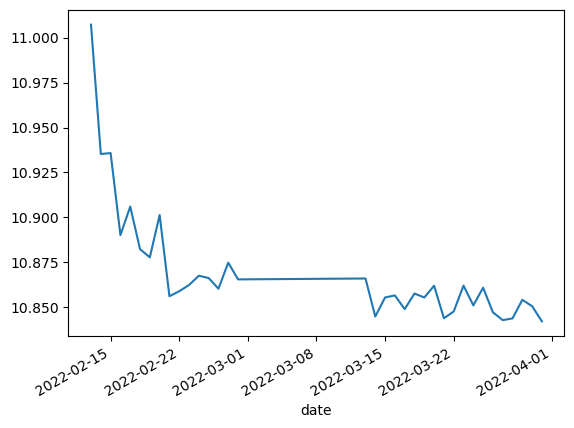

In [533]:
log_price = df_timeseries.price_x.apply(lambda x: np.log(x))
log_price.plot()

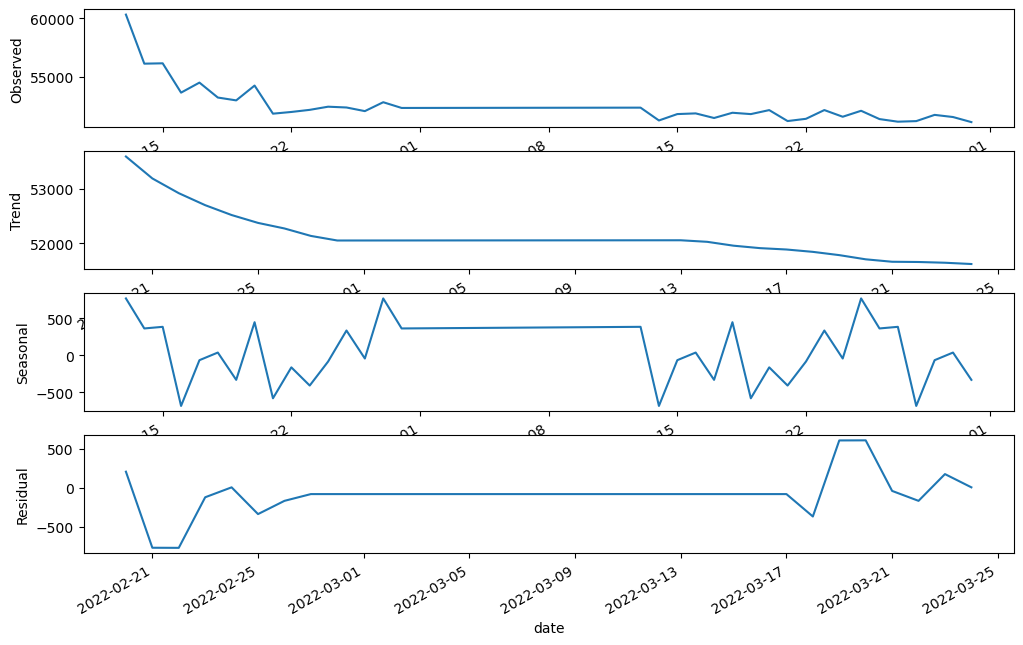

In [534]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Ensure that the data is sorted by date
df_timeseries.sort_index(inplace=True)

# Interpolate missing values if necessary
df_timeseries['price_x'].interpolate(inplace=True)

# Decompose the data using the seasonal_decompose() function
decomposition = seasonal_decompose(df_timeseries['price_x'], model='additive', period=14)

# Plot the components of the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.show()


Checking the frequency of my dataset. 

In [535]:
print(df_timeseries.index.inferred_freq)


None


In [536]:
df_timeseries.head(50)

airline   from time_taken      to       price_x
date                                                         
2022-02-13    Vistara  Delhi    02h 10m  Mumbai  60313.822331
2022-02-14  Air India  Delhi    02h 00m  Mumbai  56120.287087
2022-02-15    Vistara  Delhi    02h 10m  Mumbai  56149.915397
2022-02-16    Vistara  Delhi    02h 10m  Mumbai  53643.310488
2022-02-17  Air India  Delhi    02h 00m  Mumbai  54501.171604
2022-02-18    Vistara  Delhi    02h 10m  Mumbai  53224.650386
2022-02-19    Vistara  Delhi    02h 10m  Mumbai  52981.195297
2022-02-20    Vistara  Delhi    02h 10m  Mumbai  54247.303856
2022-02-21    Vistara  Delhi    02h 10m  Mumbai  51845.794695
2022-02-22    Vistara  Delhi    02h 10m  Mumbai  51991.619675
2022-02-23    Vistara  Delhi    02h 10m  Mumbai  52172.086514
2022-02-24    Vistara  Delhi    02h 10m  Mumbai  52441.797235
2022-02-25    Vistara  Delhi    02h 10m  Mumbai  52374.451431
2022-02-26    Vistara  Delhi    02h 10m  Mumbai  52063.309830
2022-02-27    Vistara  Delhi    02h 10m  Mumbai  52824.242843
2022-02-28    Vistara  Delhi    02h 10m  Mumbai  52334.639336
2022-03-13    Vistara  Delhi    02h 10m  Mumbai  52360.828629
2022-03-14    Vistara  Delhi    02h 10m  Mumbai  51264.440488
2022-03-15    Vistara  Delhi    02h 10m  Mumbai  51810.985112
2022-03-16    Vistara  Delhi    02h 10m  Mumbai  51869.054609
2022-03-17    Vistara  Delhi    02h 10m  Mumbai  51475.459162
2022-03-18    Vistara  Delhi    02h 10m  Mumbai  51924.139056
2022-03-19    Vistara  Delhi    02h 10m  Mumbai  51808.754280
2022-03-20    Vistara  Delhi    02h 10m  Mumbai  52150.719697
2022-03-21    Vistara  Delhi    02h 10m  Mumbai  51214.290386
2022-03-22    Vistara  Delhi    02h 10m  Mumbai  51406.713790
2022-03-23    Vistara  Delhi    02h 10m  Mumbai  52153.949178
2022-03-24    Vistara  Delhi    02h 10m  Mumbai  51583.182456
2022-03-25    Vistara  Delhi    02h 10m  Mumbai  52092.968703
2022-03-26    Vistara  Delhi    02h 10m  Mumbai  51383.279592
2022-03-27    Vistara  Delhi    02h 10m  Mumbai  51160.208098
2022-03-28    Vistara  Delhi    02h 10m  Mumbai  51209.790072
2022-03-29    Vistara  Delhi    02h 10m  Mumbai  51742.102235
2022-03-30    Vistara  Delhi    02h 10m  Mumbai  51558.758230
2022-03-31    Vistara  Delhi    02h 10m  Mumbai  51124.505820

C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

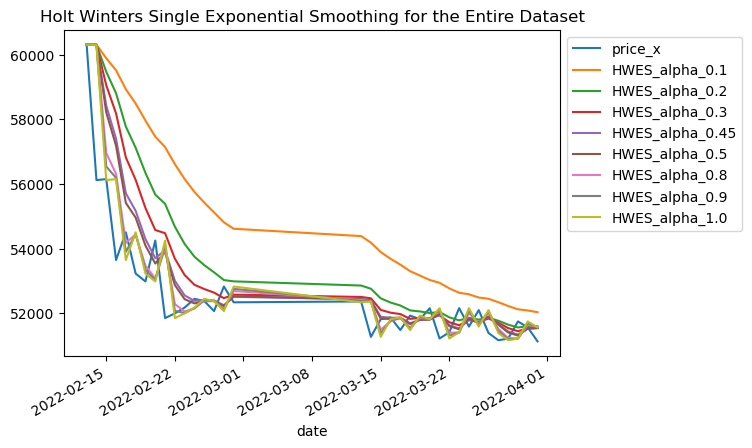

In [537]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Experiment with different values of alpha
alphas = [0.1, 0.2, 0.3, 0.45, 0.5, 0.8, 0.9, 1.0]  # Example alpha values to try

for alpha in alphas:
    df_timeseries[f'HWES_alpha_{alpha}'] = SimpleExpSmoothing(df_timeseries['price_x']).fit(
                                        smoothing_level=alpha, optimized=False, use_brute=True).fittedvalues

# Plot the original and smoothed values for different alpha values
df_timeseries[['price_x'] + [f'HWES_alpha_{alpha}' for alpha in alphas]].plot(title='Holt Winters Single Exponential Smoothing for the Entire Dataset')

# Display the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

The best alpha value for Simple Exponential Smoothing is: 0.8


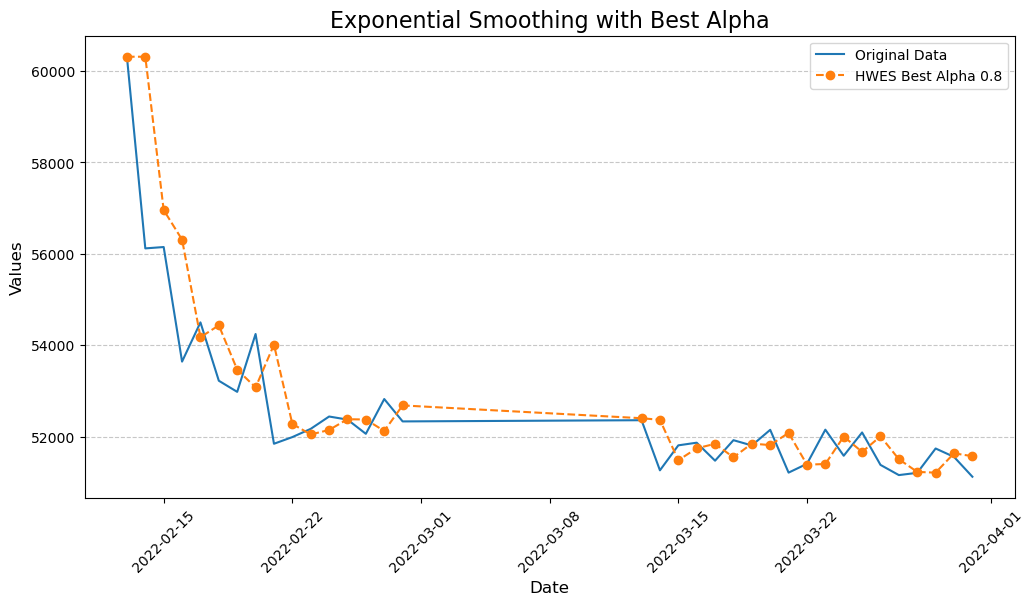

In [538]:
from sklearn.metrics import mean_squared_error

# Initialize variables
best_alpha = None
min_mse = float('inf')

# Find the best alpha value
for alpha in alphas:
    df_timeseries[f'HWES_alpha_{alpha}'] = SimpleExpSmoothing(df_timeseries['price_x']).fit(
        smoothing_level=alpha, optimized=False, use_brute=True).fittedvalues
    mse = mean_squared_error(df_timeseries['price_x'], df_timeseries[f'HWES_alpha_{alpha}'])
    if mse < min_mse:
        min_mse = mse
        best_alpha = alpha

# Print the best alpha value
print(f"The best alpha value for Simple Exponential Smoothing is: {best_alpha}")

# Plot the original and smoothed values for the best alpha value
plt.figure(figsize=(12, 6))
plt.plot(df_timeseries.index, df_timeseries['price_x'], label='Original Data')
plt.plot(df_timeseries.index, df_timeseries[f'HWES_alpha_{best_alpha}'], label=f'HWES Best Alpha {best_alpha}', linestyle='--', marker='o')

# Plot settings
plt.title('Exponential Smoothing with Best Alpha', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Double HWES
So, we’d fit the data on Double ES on both Additive and Multiplicative Trend.

C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

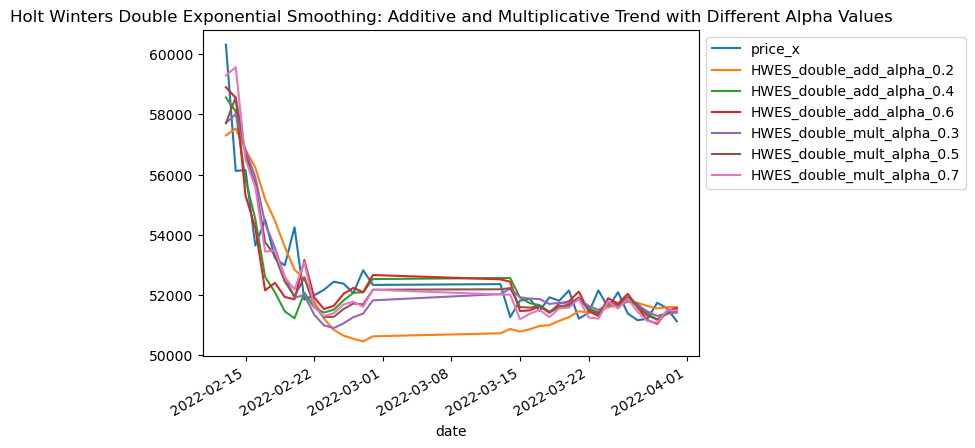

In [539]:
# Sample values for alpha
alphas_add = [0.2, 0.4, 0.6]  # Example alpha values for additive trend
alphas_mult = [0.3, 0.5, 0.7]  # Example alpha values for multiplicative trend

# Fit Double ES with different alpha values for additive trend
for alpha in alphas_add:
    model_add_alpha = ExponentialSmoothing(df_timeseries['price_x'], trend='add')
    fit_add_alpha = model_add_alpha.fit(smoothing_level=alpha)
    df_timeseries[f'HWES_double_add_alpha_{alpha}'] = fit_add_alpha.fittedvalues

# Fit Double ES with different alpha values for multiplicative trend
for alpha in alphas_mult:
    model_mult_alpha = ExponentialSmoothing(df_timeseries['price_x'], trend='mul')
    fit_mult_alpha = model_mult_alpha.fit(smoothing_level=alpha)
    df_timeseries[f'HWES_double_mult_alpha_{alpha}'] = fit_mult_alpha.fittedvalues

# Plot the original and smoothed values for Double ES with different alpha values for both trends
ax = df_timeseries[['price_x'] + [f'HWES_double_add_alpha_{alpha}' for alpha in alphas_add] + [f'HWES_double_mult_alpha_{alpha}' for alpha in alphas_mult]].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend with Different Alpha Values')

# Display the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

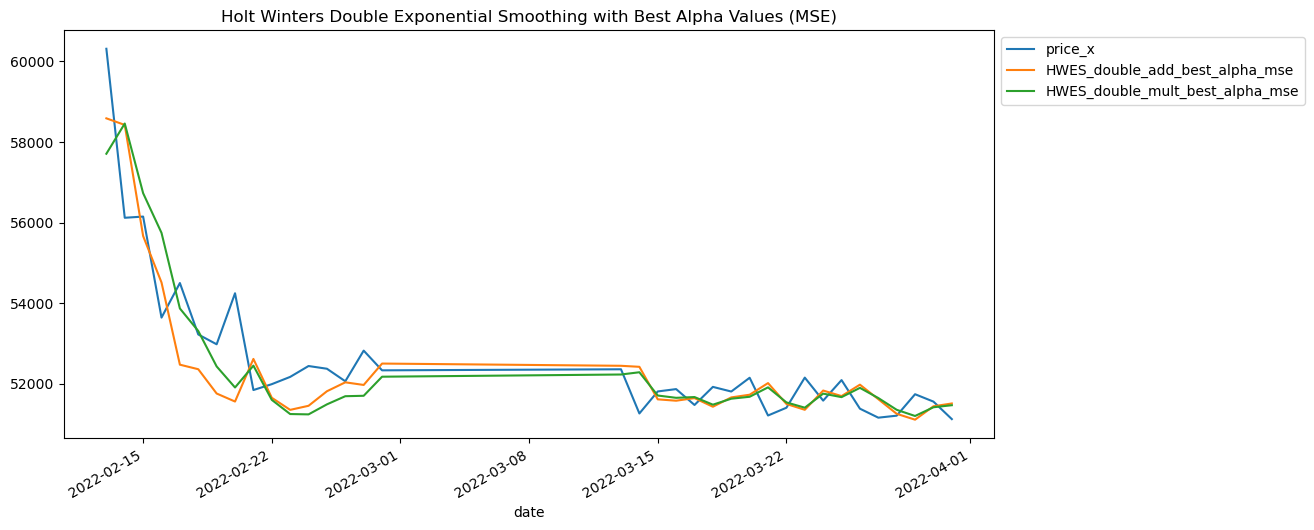

In [540]:
from sklearn.metrics import mean_squared_error

mse_scores_add = []
mse_scores_mult = []

for alpha in alphas_add:
    model_add_alpha = ExponentialSmoothing(df_timeseries['price_x'], trend='add')
    fit_add_alpha = model_add_alpha.fit(smoothing_level=alpha)
    fitted_values_add = fit_add_alpha.fittedvalues
    mse_add = mean_squared_error(df_timeseries['price_x'], fitted_values_add)
    mse_scores_add.append(mse_add)

for alpha in alphas_mult:
    model_mult_alpha = ExponentialSmoothing(df_timeseries['price_x'], trend='mul')
    fit_mult_alpha = model_mult_alpha.fit(smoothing_level=alpha)
    fitted_values_mult = fit_mult_alpha.fittedvalues
    mse_mult = mean_squared_error(df_timeseries['price_x'], fitted_values_mult)
    mse_scores_mult.append(mse_mult)

avg_mse_add = sum(mse_scores_add) / len(mse_scores_add)
avg_mse_mult = sum(mse_scores_mult) / len(mse_scores_mult)

# Fitting the model with the best alpha for additive trend
model_best_alpha_add = ExponentialSmoothing(df_timeseries['price_x'], trend='add')
fit_best_alpha_add = model_best_alpha_add.fit(smoothing_level=best_alpha_add)
df_timeseries['HWES_double_add_best_alpha_mse'] = fit_best_alpha_add.fittedvalues

# Fitting the model with the best alpha for multiplicative trend
model_best_alpha_mult = ExponentialSmoothing(df_timeseries['price_x'], trend='mul')
fit_best_alpha_mult = model_best_alpha_mult.fit(smoothing_level=best_alpha_mult)
df_timeseries['HWES_double_mult_best_alpha_mse'] = fit_best_alpha_mult.fittedvalues

# Plotting the original and smoothed values with the best alpha for both trends based on MSE
ax = df_timeseries[['price_x', 'HWES_double_add_best_alpha_mse', 'HWES_double_mult_best_alpha_mse']].plot(title='Holt Winters Double Exponential Smoothing with Best Alpha Values (MSE)', figsize=(12, 6))

# Display the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



 Triple HWES


C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anacon

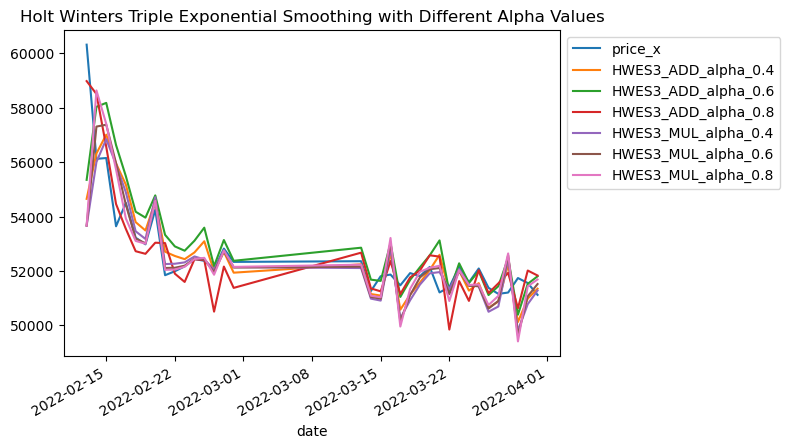

In [542]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# List of alpha values to try
alphas = [0.4, 0.6, 0.8]

for alpha in alphas:
    df_timeseries[f'HWES3_ADD_alpha_{alpha}'] = ExponentialSmoothing(df_timeseries['price_x'], 
                                                    trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=alpha).fittedvalues
    df_timeseries[f'HWES3_MUL_alpha_{alpha}'] = ExponentialSmoothing(df_timeseries['price_x'], 
                                                    trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=alpha).fittedvalues

# Plot the dataset for the original data and the fitted values for different alpha values
df_timeseries[['price_x'] + [f'HWES3_ADD_alpha_{alpha}' for alpha in alphas] + [f'HWES3_MUL_alpha_{alpha}' for alpha in alphas]].plot(title='Holt Winters Triple Exponential Smoothing with Different Alpha Values')

# Display the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\jujub\anaconda3\anacon

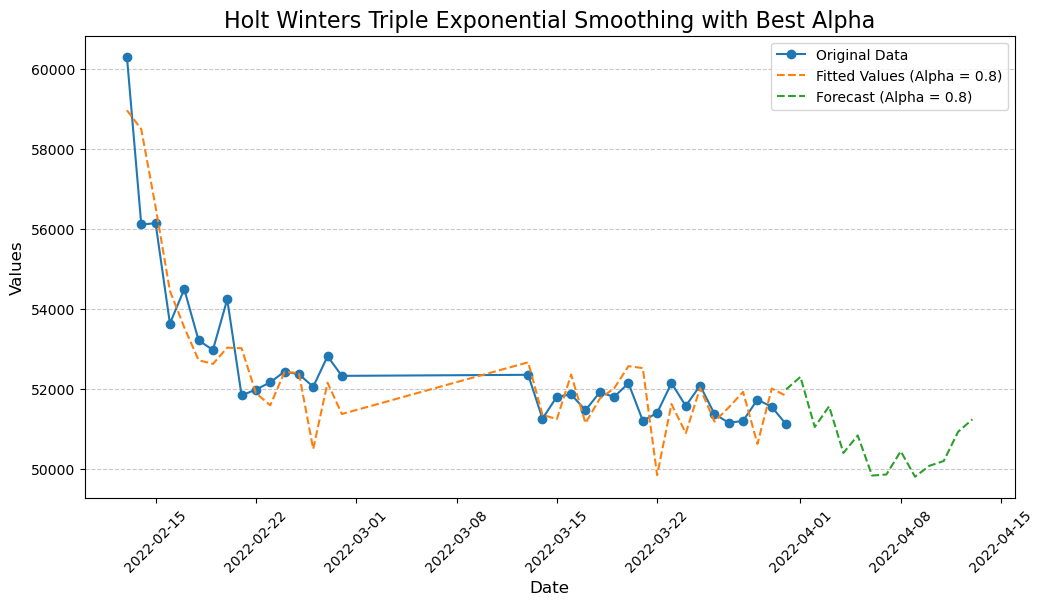

In [545]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Sample alpha values to try
alphas = [0.2, 0.4, 0.6, 0.8]

# Calculate mean squared error for different alpha values
mse_scores = []

for alpha in alphas:
    model = ExponentialSmoothing(df_timeseries['price_x'], trend='add', seasonal='add', seasonal_periods=12)
    fit = model.fit(smoothing_level=alpha)
    fitted_values = fit.fittedvalues
    mse = mean_squared_error(df_timeseries['price_x'], fitted_values)
    mse_scores.append(mse)

# Find the alpha value with the lowest MSE
best_alpha = alphas[mse_scores.index(min(mse_scores))]

# Fit the model with the best alpha
model = ExponentialSmoothing(df_timeseries['price_x'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit(smoothing_level=best_alpha)
fitted_values = fit.fittedvalues
forecast = fit.forecast(steps=14)

# Plot the results for the best alpha
plt.figure(figsize=(12, 6))
plt.plot(df_timeseries.index, df_timeseries['price_x'], label='Original Data', marker='o')
plt.plot(df_timeseries.index, fitted_values, label=f'Fitted Values (Alpha = {best_alpha})', linestyle='--')
plt.plot(pd.date_range(start=df_timeseries.index[-1], periods=14, freq='D'), forecast, label=f'Forecast (Alpha = {best_alpha})', linestyle='--')
plt.title('Holt Winters Triple Exponential Smoothing with Best Alpha', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Forecasting with Holt-Winters Exponential Smoothing (Triple ES)

C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


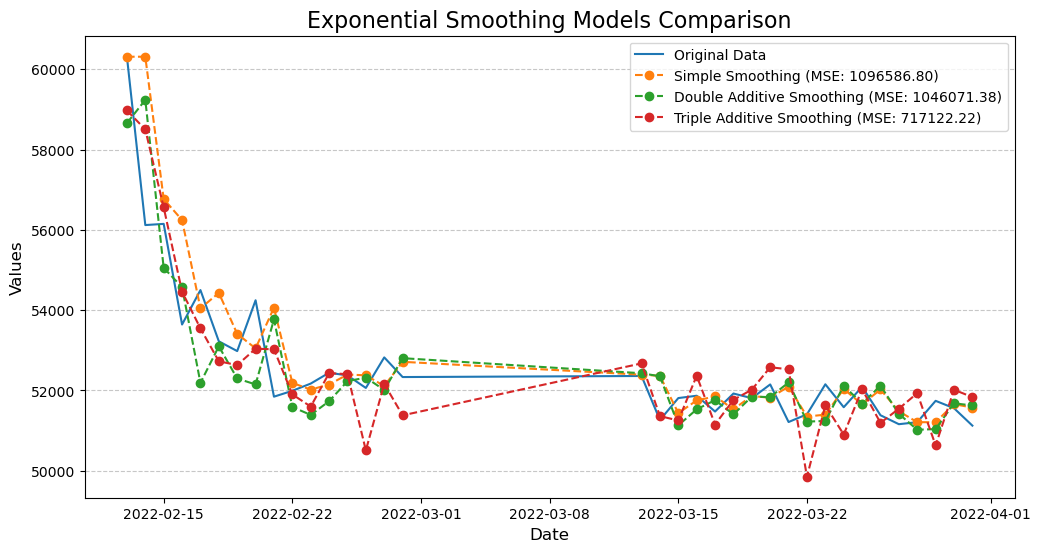

In [544]:
# Evaluate the simple exponential smoothing
model_ses = SimpleExpSmoothing(df_timeseries['price_x'])
fit_ses = model_ses.fit()
fitted_values_ses = fit_ses.fittedvalues
mse_ses = mean_squared_error(df_timeseries['price_x'], fitted_values_ses)

# Evaluate the double exponential smoothing
model_des_add = ExponentialSmoothing(df_timeseries['price_x'], trend='add')
fit_des_add = model_des_add.fit(smoothing_level=best_alpha)  # Assuming you have the best_alpha
fitted_values_des_add = fit_des_add.fittedvalues
mse_des_add = mean_squared_error(df_timeseries['price_x'], fitted_values_des_add)

# Evaluate the triple exponential smoothing
model_tes_add = ExponentialSmoothing(df_timeseries['price_x'], 
                                    trend='add', seasonal='add', seasonal_periods=12)
fit_tes_add = model_tes_add.fit(smoothing_level=best_alpha)  # Assuming you have the best_alpha
fitted_values_tes_add = fit_tes_add.fittedvalues
mse_tes_add = mean_squared_error(df_timeseries['price_x'], fitted_values_tes_add)

# Plot the results for comparison
plt.figure(figsize=(12, 6))
plt.plot(df_timeseries.index, df_timeseries['price_x'], label='Original Data')
plt.plot(df_timeseries.index, fitted_values_ses, label=f'Simple Smoothing (MSE: {mse_ses:.2f})', linestyle='--', marker='o')
plt.plot(df_timeseries.index, fitted_values_des_add, label=f'Double Additive Smoothing (MSE: {mse_des_add:.2f})', linestyle='--', marker='o')
plt.plot(df_timeseries.index, fitted_values_tes_add, label=f'Triple Additive Smoothing (MSE: {mse_tes_add:.2f})', linestyle='--', marker='o')

# Plot settings
plt.title('Exponential Smoothing Models Comparison', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
Sarimax 

C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


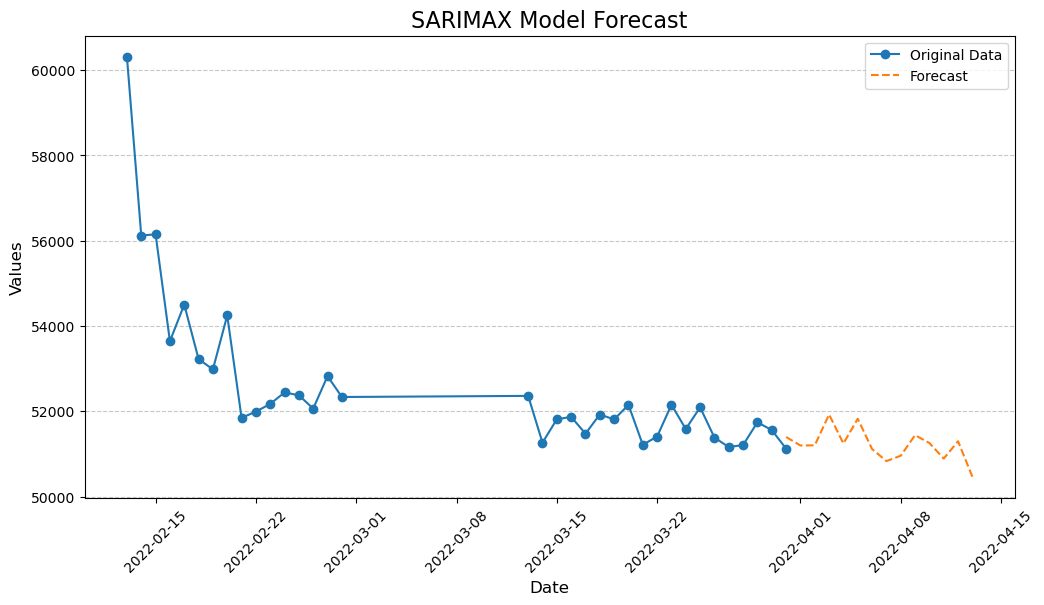

                                     SARIMAX Results                                      
Dep. Variable:                            price_x   No. Observations:                   35
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -174.225
Date:                            Thu, 26 Oct 2023   AIC                            358.450
Time:                                    13:01:06   BIC                            363.906
Sample:                                         0   HQIC                           359.736
                                             - 35                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4351      0.135      3.220      0.001       0.170       0.700
ma.L1         -0.7915      0.131   

In [546]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Replace 'df_timeseries' with your actual time series data
# Adjust the order and seasonal_order values based on your data
order = (1, 1, 1)  # Example order for (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Example seasonal order for (P, D, Q, s)

# Fit the SARIMAX model
model = SARIMAX(df_timeseries['price_x'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Generate forecasts
forecast = results.get_forecast(steps=14)  # Adjust the number of forecast steps as needed

# Plot the original data and the forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_timeseries.index, df_timeseries['price_x'], label='Original Data', marker='o')
plt.plot(pd.date_range(start=df_timeseries.index[-1], periods=14, freq='D'), forecast.predicted_mean, label='Forecast', linestyle='--')
plt.title('SARIMAX Model Forecast', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the summary of the model
print(results.summary())


Mean Squared Error: 392300.1390745692
Root Mean Squared Error: 626.3386776134531


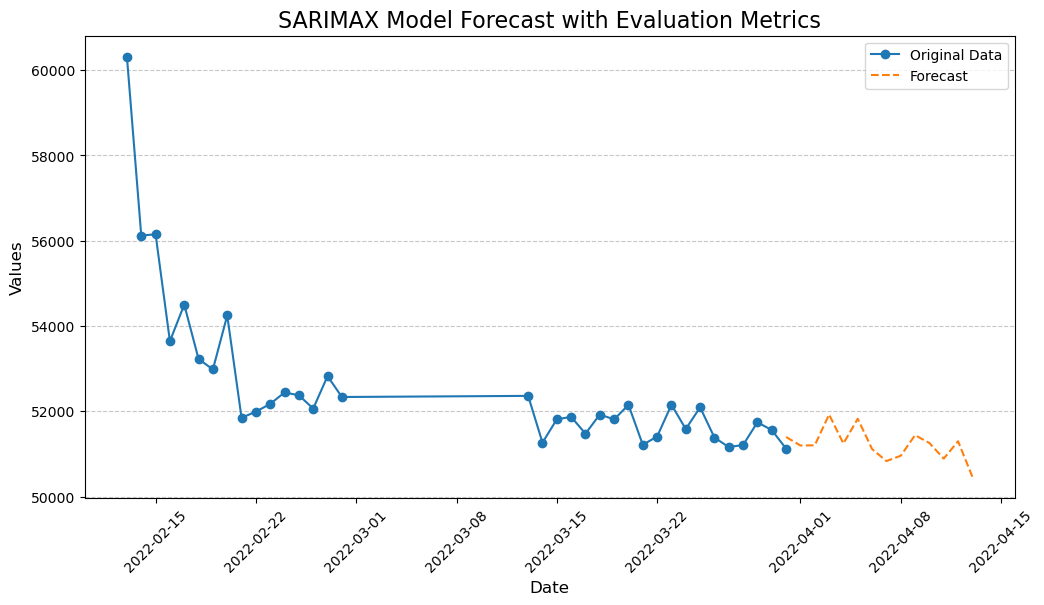

In [547]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'test_data' is your test dataset
test_data = df_timeseries.iloc[-14:]  # Assuming the last 14 data points are for testing

# Get the predicted values from the model
predicted_values = forecast.predicted_mean

# Calculate the Mean Squared Error
mse = mean_squared_error(test_data['price_x'], predicted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MSE and RMSE
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot the original data and the forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_timeseries.index, df_timeseries['price_x'], label='Original Data', marker='o')
plt.plot(pd.date_range(start=df_timeseries.index[-1], periods=14, freq='D'), forecast.predicted_mean, label='Forecast', linestyle='--')
plt.title('SARIMAX Model Forecast with Evaluation Metrics', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


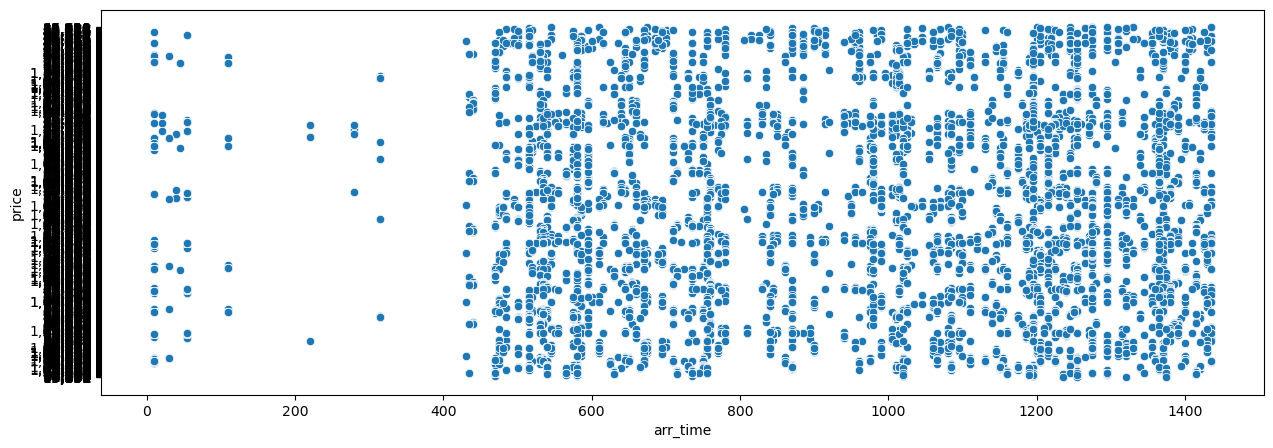

In [26]:
import regex as re

df["arr_time"] = df["arr_time"].apply(dur_conv)

plt.figure(figsize=(15,5))
sns.scatterplot(x="arr_time", y="price", data=df)
plt.show()

In [27]:
df_new = df.drop_duplicates()

##### Convert remaining "categorical" values to "numerical" values

In [28]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [29]:
df_new["airline"] = lab_enc.fit_transform(df["airline"])
df_new["from"] = lab_enc.fit_transform(df["from"])
df_new["to"] = lab_enc.fit_transform(df["to"])
df_new["date"] = lab_enc.fit_transform(df["date"])

In [30]:
df_new.head()

date  airline ch_code  num_code dep_time  from time_taken  \
0    10        0      AI       868    18:00     2    02h 00m   
1    10        0      AI       624    19:00     2    02h 15m   
2    10        0      AI       531    20:00     2    24h 45m   
3    10        0      AI       839    21:25     2    26h 30m   
4    10        0      AI       544    17:15     2    06h 40m   

                                                stop  arr_time  to   price  
0                                          non-stop       1200   5  25,612  
1                                          non-stop       1275   5  25,612  
2  1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...      1245   5  42,220  
3  1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...      1435   5  44,450  
4  1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...      1435   5  46,690

<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:white;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">BARBARA'S APPROCHE</p>

> Since my partner choce to focusing on 'time series' analysis I decided to applied clustering.
>
> Between the avaibles features in our dataset such as 'airline', 'from' and 'to' I will experiment differents combiantions to see what yields can be the most meaningful cluster

Applying Clustering on the 'from' column

In [31]:
from_counts = df['from'].value_counts()
print(from_counts)

Mumbai       19858
Delhi        18316
Bangalore    16441
Kolkata      13473
Hyderabad    12870
Chennai      12529
Name: from, dtype: int64


In [32]:
columns_to_drop = ['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'time_taken', 'stop', 'arr_time', 'to', 'price']
df_cluster = df.drop(columns=columns_to_drop)

**CLUSTERING**

In [33]:
df_cluster = pd.get_dummies(df_cluster, columns=['from'])

In [34]:
print(df_cluster.head())

   from_Bangalore  from_Chennai  from_Delhi  from_Hyderabad  from_Kolkata  \
0               0             0           1               0             0   
1               0             0           1               0             0   
2               0             0           1               0             0   
3               0             0           1               0             0   
4               0             0           1               0             0   

   from_Mumbai  
0            0  
1            0  
2            0  
3            0  
4            0  


In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster)

C:\Users\jujub\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
print(df_cluster.head())

   from_Bangalore  from_Chennai  from_Delhi  from_Hyderabad  from_Kolkata  \
0               0             0           1               0             0   
1               0             0           1               0             0   
2               0             0           1               0             0   
3               0             0           1               0             0   
4               0             0           1               0             0   

   from_Mumbai  cluster  
0            0        2  
1            0        2  
2            0        2  
3            0        2  
4            0        2  


In [37]:
from sklearn.metrics import silhouette_score
X = df_cluster.drop(columns=['cluster'])
silhouette_avg = silhouette_score(X, df_cluster['cluster'])
print(f"The average silhouette_score is: {silhouette_avg}")

The average silhouette_score is: 0.5580917013277181


# Checking the full dataset with both classes - business & economy

In [38]:
df2 = pd.read_csv('all_classes.csv')

In [39]:
df2.head()

Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955

In [40]:
df2.shape

(300153, 12)

In [41]:
df2.duplicated().sum()

0

In [42]:
df2['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

> Create a pieplot of rhe airline companies to show which has the most number of flights

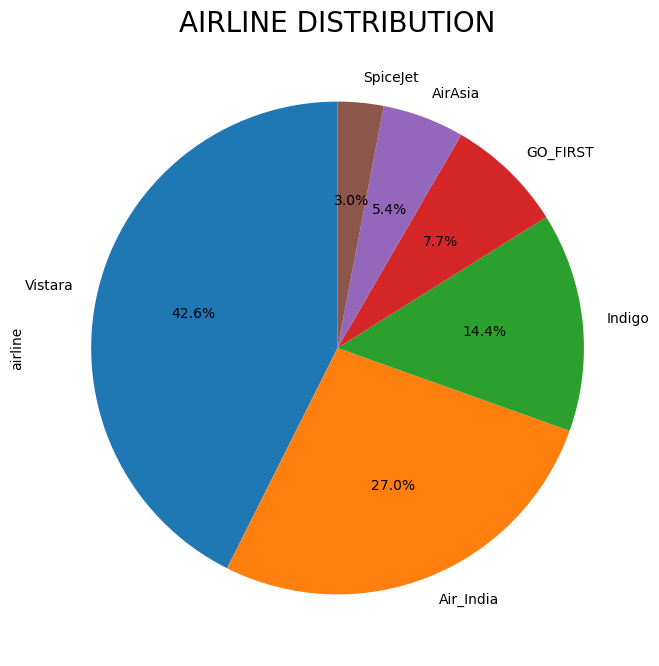

In [43]:
import matplotlib.pyplot as plt

value_counts_series = df2['airline'].value_counts()
value_counts_series.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('AIRLINE DISTRIBUTION', fontsize=20)

plt.show()

In [44]:
df2['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

<Axes: title={'center': 'CLASS'}, ylabel='class'>

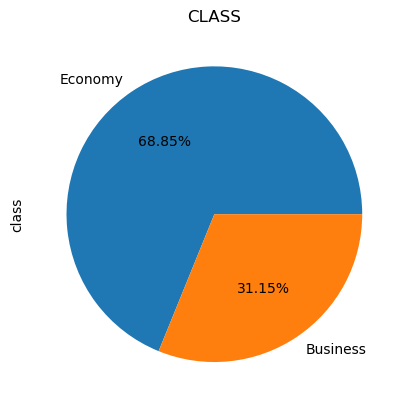

In [45]:
plt.title('CLASS')
round(df2['class'].value_counts()/df2.shape[0]*100,2).plot.pie(autopct = "%1.2f%%")

In [46]:
df2['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [47]:
df2['stops'].replace('one', '1', inplace=True)
df2['stops'].replace('zero', '0', inplace=True)
df2['stops'].replace('two_or_more', '2', inplace=True)

<Axes: xlabel='stops', ylabel='price'>

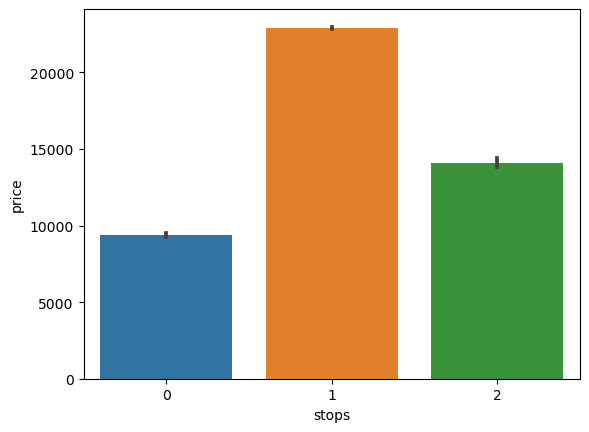

In [48]:
sns.barplot(data = df2 ,x = "stops" ,y="price")

> The plot above shows that the single stop has the most expensives prices

In [49]:
df2['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

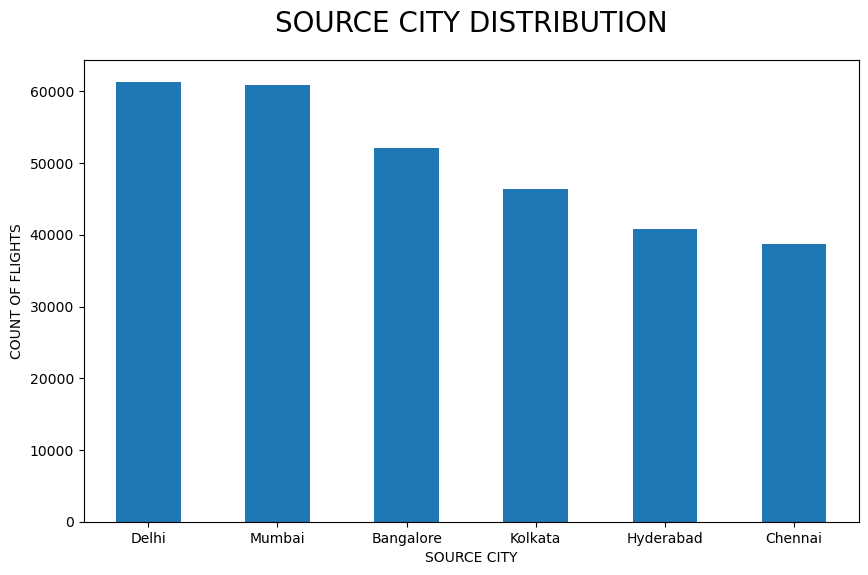

In [50]:
import matplotlib.pyplot as plt

value_counts_series = df2['source_city'].value_counts()
value_counts_series.plot(kind='bar', figsize=(10, 6))


plt.xlabel('SOURCE CITY')
plt.ylabel('COUNT OF FLIGHTS')
plt.title('SOURCE CITY DISTRIBUTION', pad=20, fontsize=20)
plt.xticks(rotation=0)

plt.show()


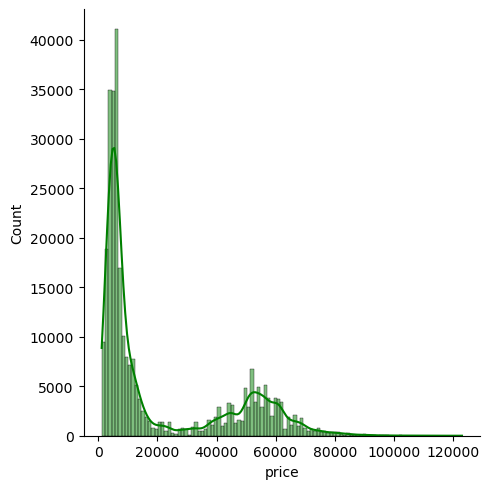

In [51]:
sns.displot(df2['price'],color='green',kde=True)

<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:white;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">REFERENCES</p>

(TO EDIT LATER)
! add here all the refereces you have used

Dataset: 
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction